In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# import the datasets:
checks_url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'
deaths_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/accidental_deaths.csv'
injuries_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/accidental_injuries.csv'
shootings_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings.csv'
checks_df = pd.read_csv(checks_url)
injuries_df = pd.read_csv(injuries_url)
deaths_df = pd.read_csv(deaths_url)
shootings_df = pd.read_csv(shootings_url)


In [0]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
states.append("District of Columbia") # Note that we are including District of Columbia

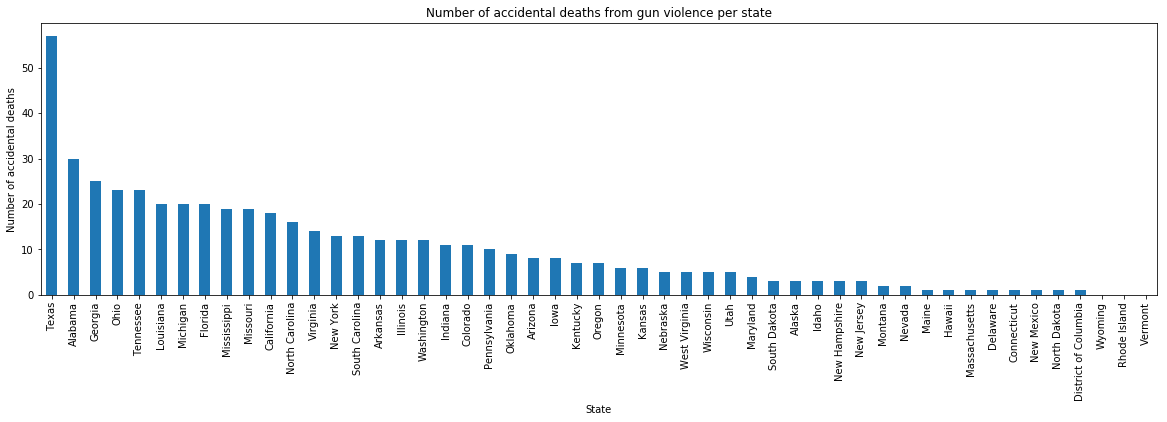

In [0]:
# Number of accidental deaths from gun violence per state
deaths_sorted = deaths_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)
deaths_sorted.plot(figsize=(20, 5), kind="bar", align="center")
plt.title("Number of accidental deaths from gun violence per state")
plt.xlabel("State")
plt.ylabel("Number of accidental deaths")
plt.show()

In [0]:
# Accidental deaths
deaths_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)

Texas                   57
Alabama                 30
Georgia                 25
Ohio                    23
Tennessee               23
Louisiana               20
Michigan                20
Florida                 20
Mississippi             19
Missouri                19
California              18
North Carolina          16
Virginia                14
New York                13
South Carolina          13
Arkansas                12
Illinois                12
Washington              12
Indiana                 11
Colorado                11
Pennsylvania            10
Oklahoma                 9
Arizona                  8
Iowa                     8
Kentucky                 7
Oregon                   7
Minnesota                6
Kansas                   6
Nebraska                 5
West Virginia            5
Wisconsin                5
Utah                     5
Maryland                 4
South Dakota             3
Alaska                   3
Idaho                    3
New Hampshire            3
N

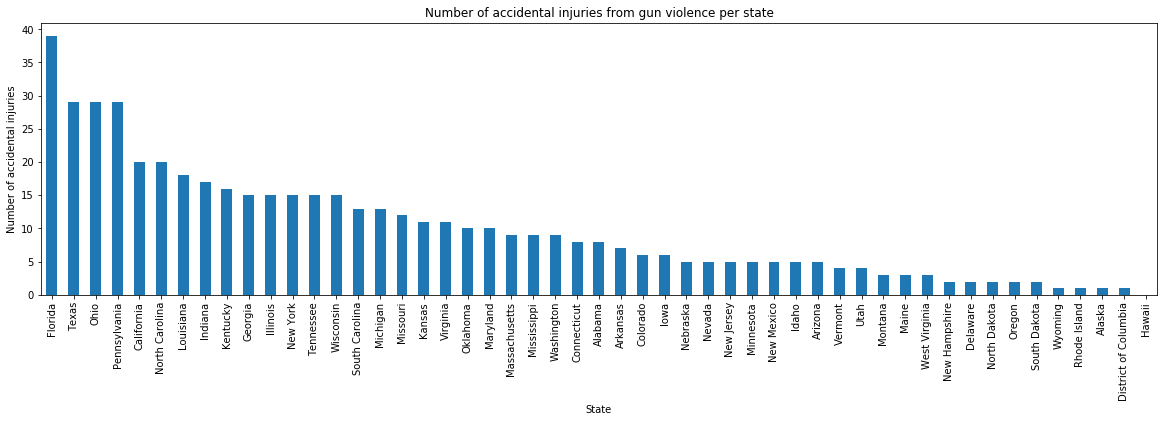

In [0]:
injuries_sorted = injuries_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)
injuries_sorted.plot(figsize=(20, 5), kind="bar", align="center")
plt.title("Number of accidental injuries from gun violence per state")
plt.xlabel("State")
plt.ylabel("Number of accidental injuries")
plt.show()

In [0]:
# Accidental injuries
injuries_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)

Florida                 39
Texas                   29
Ohio                    29
Pennsylvania            29
California              20
North Carolina          20
Louisiana               18
Indiana                 17
Kentucky                16
Georgia                 15
Illinois                15
New York                15
Tennessee               15
Wisconsin               15
South Carolina          13
Michigan                13
Missouri                12
Kansas                  11
Virginia                11
Oklahoma                10
Maryland                10
Massachusetts            9
Mississippi              9
Washington               9
Connecticut              8
Alabama                  8
Arkansas                 7
Colorado                 6
Iowa                     6
Nebraska                 5
Nevada                   5
New Jersey               5
Minnesota                5
New Mexico               5
Idaho                    5
Arizona                  5
Vermont                  4
U

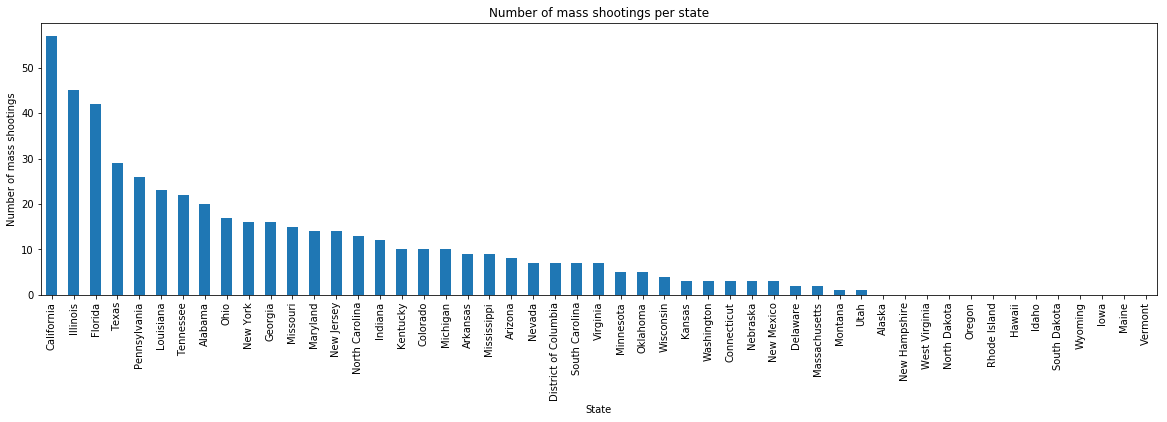

In [0]:
shootings_sorted = shootings_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)
shootings_sorted.plot(figsize=(20, 5), kind="bar", align="center")
plt.title("Number of mass shootings per state")
plt.xlabel("State")
plt.ylabel("Number of mass shootings")
plt.show()

In [0]:
# Mass shootings
shootings_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)

California              57
Illinois                45
Florida                 42
Texas                   29
Pennsylvania            26
Louisiana               23
Tennessee               22
Alabama                 20
Ohio                    17
New York                16
Georgia                 16
Missouri                15
Maryland                14
New Jersey              14
North Carolina          13
Indiana                 12
Kentucky                10
Colorado                10
Michigan                10
Arkansas                 9
Mississippi              9
Arizona                  8
Nevada                   7
District of Columbia     7
South Carolina           7
Virginia                 7
Minnesota                5
Oklahoma                 5
Wisconsin                4
Kansas                   3
Washington               3
Connecticut              3
Nebraska                 3
New Mexico               3
Delaware                 2
Massachusetts            2
Montana                  1
U

In [0]:
injuries = injuries_df['State'].value_counts().reindex(states, fill_value=0).values.tolist()

In [0]:
deaths = deaths_df['State'].value_counts().reindex(states, fill_value=0).values.tolist()

In [0]:
shootings = shootings_df['State'].value_counts().reindex(states, fill_value=0).values.tolist()

In [0]:
df = pd.DataFrame({'injuries': injuries, 'deaths': deaths, 'shootings': shootings}, index=states)

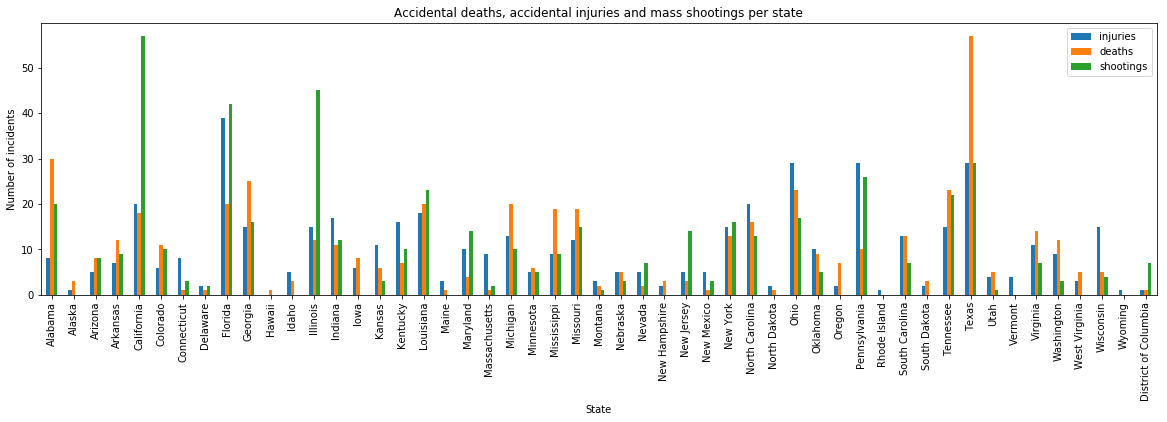

In [0]:
# Accidental deaths, accidental injuries and mass shootings per state
df.plot(figsize=(20, 5), kind="bar", align="center")
plt.title("Accidental deaths, accidental injuries and mass shootings per state")
plt.xlabel("State")
plt.ylabel("Number of incidents")
plt.show()

# **PART 2**

In [0]:
census_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/census.csv'
census_df = pd.read_csv(census_url, thousands=',') # the thousands parameter gets rid of the commas in the df

In [0]:
census_df = census_df.rename(index=str, columns={"Geographic Area\n\n": "State"})

In [0]:
census_df = census_df.drop(columns=['2010', '2011', '2012', '2013', '2014', '2015', '2016'])
census_monthly = pd.DataFrame({'State': census_df.State, '2017': census_df['2017'] // 12, '2018': census_df['2018'] // 12})


In [0]:
census_df

,State,2017,2018
0,Alabama,4875120,4887871
1,Alaska,739786,737438
2,Arizona,7048876,7171646
3,Arkansas,3002997,3013825
4,California,39399349,39557045
5,Colorado,5615902,5695564
6,Connecticut,3573880,3572665
7,Delaware,957078,967171
8,District of Columbia,695691,702455
9,Florida,20976812,21299325


In [0]:
# import the datasets:
import pandas as pd
shootings_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings.csv'
shootings_df = pd.read_csv(shootings_url)


In [0]:
shootings_df['Year'] = shootings_df['Incident Date'].str.split().str.get(2)

In [0]:
shootings_df = shootings_df.drop(columns=['Address', 'Incident Date', 'City Or County', 'Operations'])

In [0]:
shootings_df = shootings_df.loc[(shootings_df['Year'] <'2019') & (shootings_df['Year'] >= '2017')]

In [0]:
numKilledInjured = shootings_df.groupby(['State', 'Year'], as_index=False)[["# Killed", "# Injured"]].sum()

In [0]:
# Change order of states to match that of the census df
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

In [0]:
numKilledInjured = numKilledInjured.pivot(index='State', columns='Year', values=['# Killed', '# Injured']).reindex(states).reset_index('State')

In [0]:
numKilledInjured.fillna(value=0, inplace=True)

In [0]:
killed = numKilledInjured.values[:, 1:3] / census_monthly.values[:, 1:]

In [0]:
injured = numKilledInjured.values[:, 3:] / census_monthly.values[:, 1:]

In [0]:
probs_df = pd.DataFrame({'State':states, 'Killed Prob 2017': killed[:, 0], 'Killed Prob 2018': killed[:, 1], 'Injured Prob 2017': injured[:, 0], 'Injured Prob 2018': injured[:, 1]})

In [0]:
probs_df = probs_df.set_index('State')

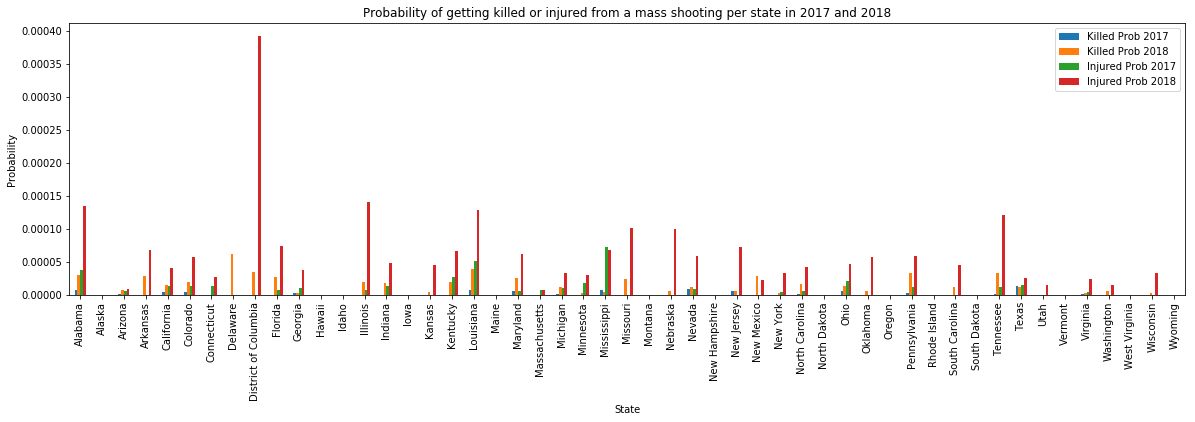

In [0]:
probs_df.plot(figsize=(20, 5), kind="bar", align="center")
plt.title("Probability of getting killed or injured from a mass shooting per state in 2017 and 2018")
plt.xlabel("State")
plt.ylabel("Probability")
plt.show()

# Part 3

In [0]:
census_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/census.csv'
census_df = pd.read_csv(census_url, thousands=',') # the thousands parameter gets rid of the commas in the df

census_df = census_df.rename(index=str, columns={"Geographic Area\n\n": "State"})

census_df = census_df.drop(columns=['2010', '2011', '2012', '2013'])



In [0]:
shootings_2014_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2014.csv'
shootings_2015_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2015.csv'
shootings_2016_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2016.csv'
shootings_2017_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2017.csv'
shootings_2018_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2018.csv'
shootings_2014 = pd.read_csv(shootings_2014_url)
shootings_2015 = pd.read_csv(shootings_2015_url)
shootings_2016 = pd.read_csv(shootings_2016_url)
shootings_2017 = pd.read_csv(shootings_2017_url)
shootings_2018 = pd.read_csv(shootings_2018_url)

In [0]:
shootings_df = shootings_2014.append([shootings_2015, shootings_2016, shootings_2017, shootings_2018])

In [0]:
shootings_df['Month'] = shootings_df['Incident Date'].str.split().str.get(0)
shootings_df['Year'] = shootings_df['Incident Date'].str.split().str.get(2)
shootings_df = shootings_df.drop(columns=['Address', 'Incident Date', 'City Or County', 'Operations'])

In [0]:
shootings_df = shootings_df.loc[(shootings_df['Year'] < '2019') & (shootings_df['Year'] >= '2014')]

In [0]:
shootings_df

,State,# Killed,# Injured,Month,Year
0,Louisiana,0,4,December,2014
1,California,1,3,December,2014
2,California,0,4,December,2014
3,Illinois,1,3,December,2014
4,Missouri,1,3,December,2014
5,Kentucky,1,3,December,2014
6,Michigan,1,3,December,2014
7,New York,4,2,December,2014
8,Illinois,0,5,December,2014
9,Florida,2,2,December,2014


In [0]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [0]:
months.sort()

In [0]:
# Change order of states to match that of the census df
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

In [0]:
import itertools 
lists = [states, months]
state_month = pd.DataFrame(list(itertools.product(*lists)), columns=['State', 'Month'])

In [0]:
census_spread = census_df.merge(state_month, left_on=['State'], right_on=['State'], how='outer')

In [0]:
census_spread

,State,2014,2015,2016,2017,2018,Month
0,Alabama,4842481,4853160,4864745,4875120,4887871,April
1,Alabama,4842481,4853160,4864745,4875120,4887871,August
2,Alabama,4842481,4853160,4864745,4875120,4887871,December
3,Alabama,4842481,4853160,4864745,4875120,4887871,February
4,Alabama,4842481,4853160,4864745,4875120,4887871,January
5,Alabama,4842481,4853160,4864745,4875120,4887871,July
6,Alabama,4842481,4853160,4864745,4875120,4887871,June
7,Alabama,4842481,4853160,4864745,4875120,4887871,March
8,Alabama,4842481,4853160,4864745,4875120,4887871,May
9,Alabama,4842481,4853160,4864745,4875120,4887871,November


In [0]:
years = ['2014', '2015', '2016', '2017', '2018']
import itertools 
lists = [states, months, years]
state_month_year = pd.DataFrame(list(itertools.product(*lists)), columns=['State', 'Month', 'Year'])

In [0]:
shootings_df = shootings_df.merge(state_month_year, left_on=['State', 'Month', 'Year'], right_on=['State', 'Month', 'Year'], how='outer')

In [0]:
shootings_df = shootings_df.groupby(['State', 'Year', 'Month'], as_index=False)[["# Killed", "# Injured"]].sum()

In [0]:
shootings_df

,State,Year,Month,# Killed,# Injured
0,Alabama,2014,April,0.0,0.0
1,Alabama,2014,August,0.0,0.0
2,Alabama,2014,December,0.0,0.0
3,Alabama,2014,February,0.0,0.0
4,Alabama,2014,January,0.0,5.0
5,Alabama,2014,July,0.0,0.0
6,Alabama,2014,June,1.0,4.0
7,Alabama,2014,March,0.0,0.0
8,Alabama,2014,May,0.0,0.0
9,Alabama,2014,November,0.0,0.0


In [0]:
shootings_df = shootings_df.pivot_table(index=['State', 'Month'], columns='Year', values=['# Killed', '# Injured']).reset_index()

In [0]:
census_df

,State,2014,2015,2016,2017,2018
0,Alabama,4842481,4853160,4864745,4875120,4887871
1,Alaska,736307,737547,741504,739786,737438
2,Arizona,6733840,6833596,6945452,7048876,7171646
3,Arkansas,2967726,2978407,2990410,3002997,3013825
4,California,38625139,38953142,39209127,39399349,39557045
5,Colorado,5351218,5452107,5540921,5615902,5695564
6,Connecticut,3594783,3587509,3578674,3573880,3572665
7,Delaware,932596,941413,949216,957078,967171
8,District of Columbia,662513,675254,686575,695691,702455
9,Florida,19860330,20224249,20629982,20976812,21299325


In [0]:
shootings_df

State      Month # Injured       ... # Killed               
Year                                2014 2015  ...     2015 2016 2017 2018
0           Alabama      April       0.0  5.0  ...      0.0  4.0  0.0  1.0
1           Alabama     August       0.0  0.0  ...      0.0  6.0  0.0  0.0
2           Alabama   December       0.0  4.0  ...      0.0  1.0  1.0  0.0
3           Alabama   February       0.0  0.0  ...      0.0  1.0  0.0  0.0
4           Alabama    January       5.0  0.0  ...      0.0  0.0  0.0  3.0
5           Alabama       July       0.0  0.0  ...      0.0  0.0  3.0  3.0
6           Alabama       June       4.0  0.0  ...      0.0  0.0  0.0  0.0
7           Alabama      March       0.0  0.0  ...      0.0  2.0  0.0  2.0
8           Alabama        May       0.0  3.0  ...      1.0  2.0  0.0  0.0
9           Alabama   November       0.0  1.0  ...      3.0  0.0  0.0  2.0
10          Alabama    October       0.0  0.0  ...      0.0  0.0  2.0  0.0
11          Alabama  September       0.0  0.0  ...      0.0  0.0  0.0  1.0
12           Alaska      April       0.0  0.0  ...      0.0  0.0  0.0  0.0
13           Alaska     August       0.0  0.0  ...      0.0  0.0  0.0  0.0
14           Alaska   December       0.0  0.0  ...      0.0  0.0  0.0  0.0
15           Alaska   February       0.0  0.0  ...      0.0  0.0  0.0  0.0
16           Alaska    January       0.0  0.0  ...      0.0  0.0  0.0  0.0
17           Alaska       July       0.0  0.0  ...      0.0  0.0  0.0  0.0
18           Alaska       June       0.0  0.0  ...      0.0  0.0  0.0  0.0
19           Alaska      March       0.0  0.0  ...      0.0  0.0  0.0  0.0
20           Alaska        May       0.0  0.0  ...      0.0  0.0  0.0  0.0
21           Alaska   November       0.0  0.0  ...      0.0  0.0  0.0  0.0
22           Alaska    October       0.0  0.0  ...      0.0  0.0  0.0  0.0
23           Alaska  September       6.0  0.0  ...      0.0  0.0  0.0  0.0
24          Arizona      April       3.0  2.0  ...      7.0  0.0  0.0  0.0
25          Arizona     August       0.0  0.0  ...      0.0  0.0  0.0  0.0
26          Arizona   December       0.0  0.0  ...      0.0  0.0  0.0  0.0
27          Arizona   February       0.0  0.0  ...      0.0  5.0  0.0  0.0
28          Arizona    January       0.0  0.0  ...      0.0  3.0  0.0  0.0
29          Arizona       July       0.0  0.0  ...      0.0  2.0  0.0  1.0
..              ...        ...       ...  ...  ...      ...  ...  ...  ...
582   West Virginia       June       0.0  0.0  ...      0.0  0.0  0.0  0.0
583   West Virginia      March       0.0  0.0  ...      0.0  0.0  0.0  0.0
584   West Virginia        May       0.0  0.0  ...      0.0  1.0  0.0  0.0
585   West Virginia   November       0.0  0.0  ...      0.0  0.0  0.0  0.0
586   West Virginia    October       0.0  0.0  ...      0.0  0.0  0.0  0.0
587   West Virginia  September       0.0  0.0  ...      0.0  0.0  0.0  0.0
588       Wisconsin      April       0.0  0.0  ...      0.0  1.0  0.0  0.0
589       Wisconsin     August       4.0  0.0  ...      0.0  2.0  0.0  0.0
590       Wisconsin   December       0.0  0.0  ...      0.0  0.0  0.0  0.0
591       Wisconsin   February       0.0  0.0  ...      0.0  0.0  0.0  0.0
592       Wisconsin    January       0.0  0.0  ...      0.0  0.0  0.0  0.0
593       Wisconsin       July       0.0  0.0  ...      0.0  0.0  0.0  0.0
594       Wisconsin       June       5.0  0.0  ...      0.0  0.0  0.0  0.0
595       Wisconsin      March       0.0  0.0  ...      0.0  0.0  5.0  0.0
596       Wisconsin        May       0.0  9.0  ...      6.0  0.0  0.0  0.0
597       Wisconsin   November       0.0  0.0  ...      0.0  0.0  0.0  0.0
598       Wisconsin    October       0.0  0.0  ...      0.0  0.0  0.0  0.0
599       Wisconsin  September       0.0  0.0  ...      0.0  0.0  0.0  1.0
600         Wyoming      April       0.0  0.0  ...      0.0  0.0  0.0  0.0
601         Wyoming     August       0.0  0.0  ...      0.0  0.0  0.0  0.0
602         Wyoming   December       0.

In [0]:
injured = shootings_df.values[:, 2:7] / census_spread.values[:, 1: 6]

In [0]:
killed = shootings_df.values[:, 7:] / census_spread.values[:, 1: 6]

In [0]:
injured

array([[0.0, 1.0302565750974622e-06, 2.672288064430921e-06,
        1.2307389356569685e-06, 8.183522028302302e-07],
       [0.0, 0.0, 2.2611668237492405e-06, 0.0, 0.0],
       [0.0, 8.242052600779698e-07, 1.4389243423858804e-06,
        1.6409852475426245e-06, 0.0],
       ...,
       [0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)

In [0]:
killed

array([[0.0, 0.0, 8.222424813633603e-07, 0.0, 2.0458805070755754e-07],
       [0.0, 0.0, 1.2333637220450404e-06, 0.0, 0.0],
       [0.0, 0.0, 2.0556062034084007e-07, 2.0512315594282807e-07, 0.0],
       ...,
       [0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)

In [0]:
# pd.DataFrame({ 'Injured Prob 2017': injured[:, 0], 'Injured Prob 2018': injured[:, 1], 'Killed Prob 2017': killed[:, 0], 'Killed Prob 2018': killed[:, 1]})
data2014 = pd.DataFrame({'State':shootings_df.State, 'Month':shootings_df.Month, 'Year': '2014', '# Killed': killed[:, 0], '# Injured': injured[:, 0]})

In [0]:
data2015 = pd.DataFrame({'State':shootings_df.State, 'Month':shootings_df.Month, 'Year': '2015', '# Killed': killed[:, 1], '# Injured': injured[:, 1]})

In [0]:
data2016 = pd.DataFrame({'State':shootings_df.State, 'Month':shootings_df.Month, 'Year': '2016', '# Killed': killed[:, 2], '# Injured': injured[:, 2]})

In [0]:
data2017 = pd.DataFrame({'State':shootings_df.State, 'Month':shootings_df.Month, 'Year': '2017', '# Killed': killed[:, 3], '# Injured': injured[:, 3]})

In [0]:
data2018 = pd.DataFrame({'State': shootings_df.State, 'Month': shootings_df.Month, 'Year': '2018', '# Killed':killed[:, 4], '# Injured': injured[:, 4] })

In [0]:
probs_mass_shootings = data2014.append(['data2015', 'data2016', 'data2017', 'data2018'], sort=False)

In [0]:
probs_mass_shootings

,0,# Injured,# Killed,Month,State,Year
0,NaN,0,0,April,Alabama,2014
1,NaN,0,0,August,Alabama,2014
2,NaN,0,0,December,Alabama,2014
3,NaN,0,0,February,Alabama,2014
4,NaN,1.03253e-06,0,January,Alabama,2014
5,NaN,0,0,July,Alabama,2014
6,NaN,8.26023e-07,2.06506e-07,June,Alabama,2014
7,NaN,0,0,March,Alabama,2014
8,NaN,0,0,May,Alabama,2014
9,NaN,0,0,November,Alabama,2014


In [0]:
### STARTING BACKGROUND CHECKS NORMALIZING ###

In [0]:
checks_url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'
checks_df = pd.read_csv(checks_url)

In [0]:
for state in ["Mariana Islands", "Puerto Rico", "Virgin Island", "Guam"]:
  checks_df = checks_df[~checks_df.state.str.contains(state)]


In [0]:
checks_df = checks_df.loc[(checks_df['month'] >= '2014-01') & (checks_df['month'] < '2019-01')]

In [0]:
checks_df['Year'] = checks_df['month'].str.split('-').str.get(0)
checks_df['Month'] = checks_df['month'].str.split('-').str.get(1)

In [0]:
checks_df = checks_df.reset_index(drop=True)


In [0]:
checks_df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Year,Month
0,2018-12,Alabama,26029.0,242.0,11463.0,13578.0,464.0,417,0.0,11.0,10.0,0.0,1124.0,1002.0,7.0,0.0,0.0,0.0,0.0,0.0,18.0,12.0,2.0,1.0,2.0,1.0,54383,2018,12
1,2018-12,Alaska,215.0,11.0,2956.0,3278.0,312.0,155,0.0,0.0,0.0,0.0,140.0,105.0,2.0,26.0,28.0,0.0,0.0,0.0,11.0,10.0,2.0,0.0,0.0,0.0,7251,2018,12
2,2018-12,Arizona,4732.0,394.0,15533.0,11436.0,1451.0,874,0.0,10.0,7.0,2.0,1173.0,546.0,4.0,73.0,8.0,2.0,0.0,0.0,15.0,12.0,1.0,1.0,0.0,1.0,36275,2018,12
3,2018-12,Arkansas,2498.0,806.0,8138.0,11736.0,369.0,398,58.0,9.0,14.0,1.0,1012.0,1178.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,30.0,3.0,3.0,2.0,0.0,26272,2018,12
4,2018-12,California,30754.0,0.0,40445.0,34180.0,3808.0,0,0.0,0.0,0.0,0.0,451.0,371.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110017,2018,12
5,2018-12,Colorado,5636.0,0.0,22627.0,18734.0,1874.0,1343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,286.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50544,2018,12
6,2018-12,Connecticut,6433.0,329.0,5904.0,2506.0,947.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16119,2018,12
7,2018-12,Delaware,179.0,0.0,1932.0,2503.0,169.0,83,0.0,3.0,0.0,0.0,11.0,12.0,1.0,34.0,0.0,0.0,0.0,0.0,62.0,29.0,4.0,2.0,0.0,0.0,5024,2018,12
8,2018-12,District of Columbia,147.0,0.0,71.0,4.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223,2018,12
9,2018-12,Florida,16478.0,0.0,60210.0,30598.0,4131.0,2584,0.0,70.0,27.0,1.0,3758.0,1365.0,7.0,642.0,83.0,2.0,0.0,0.0,214.0,134.0,38.0,37.0,39.0,1.0,120419,2018,12


In [0]:
checks_df = checks_df.rename(index=str, columns={"state": "State"})

In [0]:
checks_df = checks_df.drop(columns=['month'])

In [0]:
months = {
    "01": "January",
    "02": "February",
    "03": "March",
    "04": "April",
    "05": "May",
    "06": "June",
    "07": "July",
    "08": "August",
    "09": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}

In [0]:
checks_df['Month'] = checks_df['Month'].apply(lambda x: months[x])

In [0]:
checks_df.fillna(0.0,inplace=True)

In [0]:
checks_df

,State,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Year,Month
0,Alabama,26029.0,242.0,11463.0,13578.0,464.0,417,0.0,11.0,10.0,0.0,1124.0,1002.0,7.0,0.0,0.0,0.0,0.0,0.0,18.0,12.0,2.0,1.0,2.0,1.0,54383,2018,December
1,Alaska,215.0,11.0,2956.0,3278.0,312.0,155,0.0,0.0,0.0,0.0,140.0,105.0,2.0,26.0,28.0,0.0,0.0,0.0,11.0,10.0,2.0,0.0,0.0,0.0,7251,2018,December
2,Arizona,4732.0,394.0,15533.0,11436.0,1451.0,874,0.0,10.0,7.0,2.0,1173.0,546.0,4.0,73.0,8.0,2.0,0.0,0.0,15.0,12.0,1.0,1.0,0.0,1.0,36275,2018,December
3,Arkansas,2498.0,806.0,8138.0,11736.0,369.0,398,58.0,9.0,14.0,1.0,1012.0,1178.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,30.0,3.0,3.0,2.0,0.0,26272,2018,December
4,California,30754.0,0.0,40445.0,34180.0,3808.0,0,0.0,0.0,0.0,0.0,451.0,371.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110017,2018,December
5,Colorado,5636.0,0.0,22627.0,18734.0,1874.0,1343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,286.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50544,2018,December
6,Connecticut,6433.0,329.0,5904.0,2506.0,947.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16119,2018,December
7,Delaware,179.0,0.0,1932.0,2503.0,169.0,83,0.0,3.0,0.0,0.0,11.0,12.0,1.0,34.0,0.0,0.0,0.0,0.0,62.0,29.0,4.0,2.0,0.0,0.0,5024,2018,December
8,District of Columbia,147.0,0.0,71.0,4.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223,2018,December
9,Florida,16478.0,0.0,60210.0,30598.0,4131.0,2584,0.0,70.0,27.0,1.0,3758.0,1365.0,7.0,642.0,83.0,2.0,0.0,0.0,214.0,134.0,38.0,37.0,39.0,1.0,120419,2018,December


In [0]:
### MERGE ###

In [0]:
checks_df = checks_df.merge(state_month_year, left_on=['State', 'Month', 'Year'], right_on=['State', 'Month', 'Year'], how='outer')

In [0]:
all_cols_checks = ['permit', 'permit_recheck', 'handgun', 'long_gun',
                 'other', 'multiple', 'admin', 'prepawn_handgun', 
                 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
                 'redemption_long_gun', 'redemption_other', 'returned_handgun',
                 'returned_long_gun', 'returned_other', 'rentals_handgun', 
                 'rentals_long_gun', 'private_sale_handgun',
                 'private_sale_long_gun', 'private_sale_other',
                 'return_to_seller_handgun', 'return_to_seller_long_gun', 
                 'return_to_seller_other', 'totals']

In [0]:
checks_df

,State,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Year,Month
0,Alabama,26029.0,242.0,11463.0,13578.0,464.0,417,0.0,11.0,10.0,0.0,1124.0,1002.0,7.0,0.0,0.0,0.0,0.0,0.0,18.0,12.0,2.0,1.0,2.0,1.0,54383,2018,December
1,Alaska,215.0,11.0,2956.0,3278.0,312.0,155,0.0,0.0,0.0,0.0,140.0,105.0,2.0,26.0,28.0,0.0,0.0,0.0,11.0,10.0,2.0,0.0,0.0,0.0,7251,2018,December
2,Arizona,4732.0,394.0,15533.0,11436.0,1451.0,874,0.0,10.0,7.0,2.0,1173.0,546.0,4.0,73.0,8.0,2.0,0.0,0.0,15.0,12.0,1.0,1.0,0.0,1.0,36275,2018,December
3,Arkansas,2498.0,806.0,8138.0,11736.0,369.0,398,58.0,9.0,14.0,1.0,1012.0,1178.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,30.0,3.0,3.0,2.0,0.0,26272,2018,December
4,California,30754.0,0.0,40445.0,34180.0,3808.0,0,0.0,0.0,0.0,0.0,451.0,371.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110017,2018,December
5,Colorado,5636.0,0.0,22627.0,18734.0,1874.0,1343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,286.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50544,2018,December
6,Connecticut,6433.0,329.0,5904.0,2506.0,947.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16119,2018,December
7,Delaware,179.0,0.0,1932.0,2503.0,169.0,83,0.0,3.0,0.0,0.0,11.0,12.0,1.0,34.0,0.0,0.0,0.0,0.0,62.0,29.0,4.0,2.0,0.0,0.0,5024,2018,December
8,District of Columbia,147.0,0.0,71.0,4.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223,2018,December
9,Florida,16478.0,0.0,60210.0,30598.0,4131.0,2584,0.0,70.0,27.0,1.0,3758.0,1365.0,7.0,642.0,83.0,2.0,0.0,0.0,214.0,134.0,38.0,37.0,39.0,1.0,120419,2018,December


In [0]:
checks_df = checks_df.pivot_table(index=['State', 'Month'], columns='Year', values=all_cols_checks).reset_index()

In [0]:
checks_df

State      Month admin       ...  totals                     
Year                            2014 2015  ...    2015   2016   2017   2018
0           Alabama      April   0.0  0.0  ...   46971  41239  32652  34915
1           Alabama     August   0.0  0.0  ...   62770  42455  35038  37227
2           Alabama   December   0.0  0.0  ...  120914  62014  56545  54383
3           Alabama   February   0.0  0.0  ...   62220  77411  46251  45171
4           Alabama    January   0.0  0.0  ...   51119  73218  41542  38477
5           Alabama       July   0.0  0.0  ...   56762  48927  31474  32572
6           Alabama       June   0.0  0.0  ...   45952  44976  35687  32572
7           Alabama      March   0.0  0.0  ...   57152  55486  48769  50610
8           Alabama        May   0.0  0.0  ...   45128  36157  33331  33193
9           Alabama   November   0.0  0.0  ...   71137  50477  47418  45345
10          Alabama    October   0.0  0.0  ...   61156  43251  36619  37123
11          Alabama  September   0.0  0.0  ...   56228  41336  32019  32706
12           Alaska      April   0.0  0.0  ...    7030   6867   6983   7367
13           Alaska     August   0.0  0.0  ...    6976   7194   6946   6818
14           Alaska   December   0.0  0.0  ...   11055   8786   8330   7251
15           Alaska   February   0.0  0.0  ...    6731   6779   5917   5392
16           Alaska    January   0.0  0.0  ...    5348   6085   4500   4429
17           Alaska       July   0.0  0.0  ...    6029   6793   6487   5714
18           Alaska       June   0.0  0.0  ...    5830   7406   6353   6330
19           Alaska      March   0.0  0.0  ...    7223   6982   6971   7800
20           Alaska        May   0.0  0.0  ...    6168   5991   6442   7548
21           Alaska   November   0.0  0.0  ...    7095   8514   7527   6645
22           Alaska    October   0.0  0.0  ...    9941   9383   8080   7768
23           Alaska  September   0.0  0.0  ...    6195   6867   6303   5699
24          Arizona      April   0.0  0.0  ...   24762  32005  32052  31658
25          Arizona     August   0.0  0.0  ...   25003  33422  29376  34149
26          Arizona   December   0.0  0.0  ...   47759  44887  41559  36275
27          Arizona   February   0.0  0.0  ...   30563  35307  37388  36281
28          Arizona    January   0.0  0.0  ...   24620  31910  31366  28627
29          Arizona       July   0.0  0.0  ...   23779  34496  25714  26359
..              ...        ...   ...  ...  ...     ...    ...    ...    ...
582   West Virginia       June   3.0  4.0  ...   14695  16423  14498  14127
583   West Virginia      March  39.0  6.0  ...   25804  22143  22529  40701
584   West Virginia        May   1.0  0.0  ...   15288  14918  15085  17108
585   West Virginia   November   1.0  2.0  ...   25063  25378  24455  22695
586   West Virginia    October   1.0  5.0  ...   21388  20035  18256  17523
587   West Virginia  September   1.0  5.0  ...   17801  18079  16723  15411
588       Wisconsin      April   0.0  0.0  ...   31164  38403  45872  41542
589       Wisconsin     August   0.0  0.0  ...   28396  53689  40924  32732
590       Wisconsin   December   0.0  0.0  ...   52450  56928  47120  43572
591       Wisconsin   February   0.0  0.0  ...   32541  42855  50720  43777
592       Wisconsin    January   0.0  0.0  ...   24587  39561  46775  36791
593       Wisconsin       July   0.0  0.0  ...   24350  38922  32846  26598
594       Wisconsin       June   0.0  0.0  ...   22715  30747  36267  26403
595       Wisconsin      March   0.0  0.0  ...   37433  44925  58739  56482
596       Wisconsin        May   0.0  0.0  ...   24362  27431  37888  28841
597       Wisconsin   November   0.0  0.0  ...   38541  65277  48683  45446
598       Wisconsin    October   0.0  0.0  ...   36111  63442  43183  37142
599       Wisconsin  September   0.0  0.0  ...   30630  59639  37506  33194
600         Wyoming      April   0.0  1.0  ...    4697   5029   4269   5065
601         Wyoming     August   1.0  1.0  ...    4839   5295 

In [0]:
probs_mass_shootings = probs_mass_shootings.drop(columns=[0])

In [0]:
checks2014 = pd.DataFrame({'State': checks_df.})

In [0]:
census_spread

,State,2014,2015,2016,2017,2018,Month
0,Alabama,4842481,4853160,4864745,4875120,4887871,April
1,Alabama,4842481,4853160,4864745,4875120,4887871,August
2,Alabama,4842481,4853160,4864745,4875120,4887871,December
3,Alabama,4842481,4853160,4864745,4875120,4887871,February
4,Alabama,4842481,4853160,4864745,4875120,4887871,January
5,Alabama,4842481,4853160,4864745,4875120,4887871,July
6,Alabama,4842481,4853160,4864745,4875120,4887871,June
7,Alabama,4842481,4853160,4864745,4875120,4887871,March
8,Alabama,4842481,4853160,4864745,4875120,4887871,May
9,Alabama,4842481,4853160,4864745,4875120,4887871,November


In [0]:
checks_df.rentals_long_gun

Year,2014,2015,2016,2017,2018
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0


In [0]:
checks_df.permit_recheck

Year,2014,2015,2016,2017,2018
0,0.0,0.0,0.0,340.0,0.0
1,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,242.0
3,0.0,0.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,89.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,313.0,3.0
9,0.0,0.0,0.0,400.0,17.0


In [0]:
import numpy as np
permit = np.array(checks_df['permit']) / census_spread.values[:, 1:6]
permit_recheck = np.array(checks_df['permit_recheck']) / census_spread.values[:, 1:6]
handgun = np.array(checks_df['handgun']) / census_spread.values[:, 1:6]
long_gun = np.array(checks_df['long_gun']) / census_spread.values[:, 1:6]
other = np.array(checks_df['other']) / census_spread.values[:, 1:6]
multiple = np.array(checks_df['multiple']) / census_spread.values[:, 1:6]
admin = np.array(checks_df['admin']) / census_spread.values[:, 1:6]
prepawn_handgun = np.array(checks_df['prepawn_handgun']) / census_spread.values[:, 1:6]
prepawn_long_gun = np.array(checks_df['prepawn_long_gun']) / census_spread.values[:, 1:6]
prepawn_other = np.array(checks_df['prepawn_other']) / census_spread.values[:, 1:6]
redemption_handgun = np.array(checks_df['redemption_handgun']) / census_spread.values[:, 1:6]
redemption_long_gun = np.array(checks_df['redemption_long_gun']) / census_spread.values[:, 1:6]
redemption_other = np.array(checks_df['redemption_other']) / census_spread.values[:, 1:6]
returned_handgun = np.array(checks_df['returned_handgun']) / census_spread.values[:, 1:6]
returned_long_gun = np.array(checks_df['returned_long_gun']) / census_spread.values[:, 1:6]
returned_other = np.array(checks_df['returned_other']) / census_spread.values[:, 1:6]
rentals_handgun = np.array(checks_df['rentals_handgun']) / census_spread.values[:, 1:6]
rentals_long_gun = np.array(checks_df['rentals_long_gun']) / census_spread.values[:, 1:6]
private_sale_handgun = np.array(checks_df['private_sale_handgun']) / census_spread.values[:, 1:6]
private_sale_long_gun = np.array(checks_df['private_sale_long_gun']) / census_spread.values[:, 1:6]
private_sale_other = np.array(checks_df['private_sale_other']) / census_spread.values[:, 1:6]
return_to_seller_handgun = np.array(checks_df['return_to_seller_handgun']) / census_spread.values[:, 1:6]
return_to_seller_long_gun = np.array(checks_df['return_to_seller_long_gun']) / census_spread.values[:, 1:6]
return_to_seller_other = np.array(checks_df['return_to_seller_other']) / census_spread.values[:, 1:6]
totals = np.array(checks_df['totals']) / census_spread.values[:, 1:6]


In [0]:
# probs_df = pd.DataFrame({'State':states, 'Killed Prob 2017': killed[:, 0], 'Killed Prob 2018': killed[:, 1], 'Injured Prob 2017': injured[:, 0], 'Injured Prob 2018': injured[:, 1]})
probs_mass_shootings['# Injured']

0                0
1                0
2                0
3                0
4      1.03253e-06
5                0
6      8.26023e-07
7                0
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
19               0
20               0
21               0
22               0
23     8.14877e-06
24     4.45511e-07
25               0
26               0
27               0
28               0
29               0
          ...     
586              0
587              0
588              0
589    6.95413e-07
590              0
591              0
592              0
593              0
594    8.69267e-07
595              0
596              0
597              0
598              0
599              0
600              0
601              0
602              0
603              0
604              0
605              0
606              0
607         

In [0]:
all_cols_checks

['permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals']

In [0]:
# pd.DataFrame({ 'Injured Prob 2017': injured[:, 0], 'Injured Prob 2018': injured[:, 1], 'Killed Prob 2017': killed[:, 0], 'Killed Prob 2018': killed[:, 1]})
checks2014 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2014', 'permit': permit[:, 0], 'permit_recheck': permit_recheck[:, 0], 'handgun': handgun[:, 0], 'long_gun': long_gun[:, 0], 'other': other[:, 0], 'multiple':multiple[:, 0], 'admin': admin[:, 0], 'prepawn_handgun':prepawn_handgun[:, 0], 'prepawn_long_gun': prepawn_long_gun[:, 0], 'prepawn_other':prepawn_other[:,0], 'redemption_handgun':redemption_handgun[:, 0], 'redemption_long_gun': redemption_long_gun[:, 0], 'redemption_other': redemption_other[:,0], 'returned_handgun':returned_handgun[:, 0],'returned_long_gun':returned_long_gun[:,0],'returned_other':returned_other[:,0],'rentals_handgun':rentals_handgun[:,0], 'rentals_long_gun':rentals_long_gun[:,0], 'private_sale_handgun':private_sale_handgun[:,0],'private_sale_long_gun':private_sale_long_gun[:,0], 'private_sale_other':private_sale_other[:,0], 'return_to_seller_handgun':return_to_seller_handgun[:,0],'return_to_seller_long_gun':return_to_seller_long_gun[:,0], 'return_to_seller_other':return_to_seller_other[:,0], 'totals':totals[:,0]         })

In [0]:
checks2015 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2015', 'permit': permit[:, 1], 'permit_recheck': permit_recheck[:, 1], 'handgun': handgun[:, 1], 'long_gun': long_gun[:,1], 'other': other[:, 1], 'multiple':multiple[:, 1], 'admin': admin[:, 1], 'prepawn_handgun':prepawn_handgun[:, 1], 'prepawn_long_gun': prepawn_long_gun[:, 1], 'prepawn_other':prepawn_other[:,1], 'redemption_handgun':redemption_handgun[:, 1], 'redemption_long_gun': redemption_long_gun[:, 1], 'redemption_other': redemption_other[:,1], 'returned_handgun':returned_handgun[:, 1],'returned_long_gun':returned_long_gun[:,1],'returned_other':returned_other[:,1],'rentals_handgun':rentals_handgun[:,1], 'rentals_long_gun':rentals_long_gun[:,1], 'private_sale_handgun':private_sale_handgun[:,1],'private_sale_long_gun':private_sale_long_gun[:,1], 'private_sale_other':private_sale_other[:,1], 'return_to_seller_handgun':return_to_seller_handgun[:,1],'return_to_seller_long_gun':return_to_seller_long_gun[:,1], 'return_to_seller_other':return_to_seller_other[:,1], 'totals':totals[:,1]         })

In [0]:
checks2016 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2016', 'permit': permit[:, 2], 'permit_recheck': permit_recheck[:, 2], 'handgun': handgun[:,2], 'long_gun': long_gun[:,2], 'other': other[:, 2], 'multiple':multiple[:, 2], 'admin': admin[:, 2], 'prepawn_handgun':prepawn_handgun[:, 2], 'prepawn_long_gun': prepawn_long_gun[:, 2], 'prepawn_other':prepawn_other[:,2], 'redemption_handgun':redemption_handgun[:, 2], 'redemption_long_gun': redemption_long_gun[:, 2], 'redemption_other': redemption_other[:,1], 'returned_handgun':returned_handgun[:, 2],'returned_long_gun':returned_long_gun[:,2],'returned_other':returned_other[:,2],'rentals_handgun':rentals_handgun[:,2], 'rentals_long_gun':rentals_long_gun[:,2], 'private_sale_handgun':private_sale_handgun[:,2],'private_sale_long_gun':private_sale_long_gun[:,2], 'private_sale_other':private_sale_other[:,2], 'return_to_seller_handgun':return_to_seller_handgun[:,2],'return_to_seller_long_gun':return_to_seller_long_gun[:,2], 'return_to_seller_other':return_to_seller_other[:,2], 'totals':totals[:,2]         })

In [0]:
checks2017 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2017', 'permit': permit[:, 3], 'permit_recheck': permit_recheck[:, 3], 'handgun': handgun[:, 3], 'long_gun': long_gun[:,3], 'other': other[:, 3], 'multiple':multiple[:, 3], 'admin': admin[:, 3], 'prepawn_handgun':prepawn_handgun[:, 3], 'prepawn_long_gun': prepawn_long_gun[:, 3], 'prepawn_other':prepawn_other[:,3], 'redemption_handgun':redemption_handgun[:, 3], 'redemption_long_gun': redemption_long_gun[:, 3], 'redemption_other': redemption_other[:,3], 'returned_handgun':returned_handgun[:, 3],'returned_long_gun':returned_long_gun[:,3],'returned_other':returned_other[:,3],'rentals_handgun':rentals_handgun[:,3], 'rentals_long_gun':rentals_long_gun[:,3], 'private_sale_handgun':private_sale_handgun[:,3],'private_sale_long_gun':private_sale_long_gun[:,3], 'private_sale_other':private_sale_other[:,3], 'return_to_seller_handgun':return_to_seller_handgun[:,3],'return_to_seller_long_gun':return_to_seller_long_gun[:,3], 'return_to_seller_other':return_to_seller_other[:,3], 'totals':totals[:,3]         })

In [0]:
checks2018 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2018', 'permit': permit[:, 4], 'permit_recheck': permit_recheck[:, 4], 'handgun': handgun[:, 4], 'long_gun': long_gun[:,4], 'other': other[:, 4], 'multiple':multiple[:, 4], 'admin': admin[:, 4], 'prepawn_handgun':prepawn_handgun[:, 4], 'prepawn_long_gun': prepawn_long_gun[:, 4], 'prepawn_other':prepawn_other[:,4], 'redemption_handgun':redemption_handgun[:, 4], 'redemption_long_gun': redemption_long_gun[:, 4], 'redemption_other': redemption_other[:,4], 'returned_handgun':returned_handgun[:, 4],'returned_long_gun':returned_long_gun[:,4],'returned_other':returned_other[:,4],'rentals_handgun':rentals_handgun[:,4], 'rentals_long_gun':rentals_long_gun[:,4], 'private_sale_handgun':private_sale_handgun[:,4],'private_sale_long_gun':private_sale_long_gun[:,4], 'private_sale_other':private_sale_other[:,4], 'return_to_seller_handgun':return_to_seller_handgun[:,4],'return_to_seller_long_gun':return_to_seller_long_gun[:,4], 'return_to_seller_other':return_to_seller_other[:,4], 'totals':totals[:,4]         })

In [0]:
probs_checks = checks2014.append(['checks2015', 'checks2016', 'checks2017', 'checks2018'], sort=False)

In [0]:
checks_vs_ms = probs_checks.merge(probs_mass_shootings, left_on=['State', 'Year', 'Month'], right_on=['State', 'Year', 'Month'], how='outer')

In [0]:
checks_vs_ms['# Killed'].fillna(0, inplace = True)
checks_vs_ms['# Injured'].fillna(0, inplace = True)

In [0]:
checks_vs_ms = checks_vs_ms.drop(columns=0)

In [0]:
checks_vs_ms

,Month,State,Year,admin,handgun,long_gun,multiple,other,permit,permit_recheck,prepawn_handgun,prepawn_long_gun,prepawn_other,private_sale_handgun,private_sale_long_gun,private_sale_other,redemption_handgun,redemption_long_gun,redemption_other,rentals_handgun,rentals_long_gun,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,returned_handgun,returned_long_gun,returned_other,totals,# Injured,# Killed
0,April,Alabama,2014,0,0.00285845,0.00212391,0.000129686,0.000117915,0.00361344,0,1.85855e-06,3.5106e-06,0,0,0,0,0.000383275,0.000334539,1.23903e-06,0,0,0,0,0,0,0,0,0.00956782,0.000000e+00,0.000000e+00
1,August,Alabama,2014,0,0.00270151,0.00243801,0.000161281,0.000104079,0.00306103,0,2.89108e-06,2.47807e-06,0,0,0,0,0.00049231,0.000423543,1.65205e-06,0,0,0,0,0,0,0,0,0.00938878,0.000000e+00,0.000000e+00
2,December,Alabama,2014,0,0.00487973,0.00608139,0.000233351,0.000159629,0.00340094,0,1.65205e-06,4.33662e-06,0,0,0,0,0.000466703,0.000439031,1.65205e-06,0,0,0,0,0,0,0,0,0.0156684,0.000000e+00,0.000000e+00
3,February,Alabama,2014,0,0.00407023,0.00298174,0.000224472,0.000140217,0.00445908,0,1.65205e-06,3.09759e-06,0,0,0,0,0.000665361,0.000657308,2.27156e-06,0,0,0,0,0,0,0,0,0.0132054,0.000000e+00,0.000000e+00
4,January,Alabama,2014,0,0.00255468,0.00264121,0.000120393,0.000119567,0.00451855,0,1.65205e-06,3.30409e-06,2.06506e-07,0,0,0,0.000404751,0.000400828,1.65205e-06,0,0,0,0,0,0,0,0,0.0107668,1.032529e-06,0.000000e+00
5,July,Alabama,2014,0,0.00238597,0.00197089,0.000123903,0.000101601,0.00359939,0,1.65205e-06,3.92361e-06,2.06506e-07,0,0,0,0.000465051,0.000349614,1.44554e-06,0,0,0,0,0,0,0,0,0.00900365,0.000000e+00,0.000000e+00
6,June,Alabama,2014,0,0.00236181,0.00212267,0.000117295,8.61129e-05,0.00318845,0,2.47807e-06,2.47807e-06,0,0,0,0,0.000406403,0.000323801,1.65205e-06,0,0,0,0,0,0,0,0,0.00861315,8.260229e-07,2.065057e-07
7,March,Alabama,2014,0,0.00357028,0.00271369,0.000157357,0.000142695,0.00451194,0,1.44554e-06,2.27156e-06,0,0,0,0,0.000400002,0.000404751,1.85855e-06,0,0,0,0,0,0,0,0,0.0119063,0.000000e+00,0.000000e+00
8,May,Alabama,2014,0,0.00265814,0.0018187,0.000128034,0.000103666,0.00334849,0,1.44554e-06,2.06506e-06,0,0,0,0,0.000474963,0.000366341,8.26023e-07,0,0,0,0,0,0,0,0,0.00890267,0.000000e+00,0.000000e+00
9,November,Alabama,2014,0,0.00336625,0.00464679,0.000198865,0.000112339,0.00237667,0,2.27156e-06,2.68457e-06,0,0,0,0,0.000409294,0.000514819,1.23903e-06,0,0,0,0,0,0,0,0,0.0116312,0.000000e+00,0.000000e+00


In [0]:
checks_vs_ms['# Killed']

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
5      0.000000e+00
6      2.065057e-07
7      0.000000e+00
8      0.000000e+00
9      0.000000e+00
10     0.000000e+00
11     0.000000e+00
12     0.000000e+00
13     0.000000e+00
14     0.000000e+00
15     0.000000e+00
16     0.000000e+00
17     0.000000e+00
18     0.000000e+00
19     0.000000e+00
20     0.000000e+00
21     0.000000e+00
22     0.000000e+00
23     0.000000e+00
24     1.485037e-07
25     0.000000e+00
26     0.000000e+00
27     0.000000e+00
28     0.000000e+00
29     0.000000e+00
           ...     
598    0.000000e+00
599    0.000000e+00
600    0.000000e+00
601    0.000000e+00
602    0.000000e+00
603    0.000000e+00
604    0.000000e+00
605    0.000000e+00
606    0.000000e+00
607    0.000000e+00
608    0.000000e+00
609    0.000000e+00
610    0.000000e+00
611    0.000000e+00
612    0.000000e+00
613    0.000000e+00
614    0.000000e+00
615    0.000000e+00
616    0.000000e+00


In [0]:
checks_vs_ms.fillna(0.0, inplace=True)

In [0]:
X = checks_vs_ms[[toc]] # Features to train on
y = checks_vs_ms[['# Killed', '# Injured']]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
lm.score(X_train, y_train)

8.691184688264882e-05

In [0]:
predictions = lm.predict(X_test)

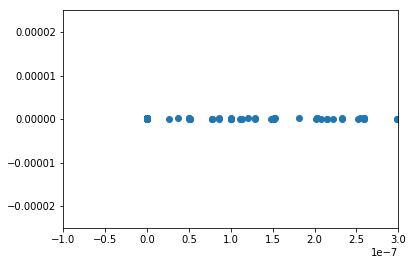

In [0]:
plt.xlim([-0.0000001, 0.0000003])
plt.ylim([-0.000025, 0.000025])
plt.scatter(y_test,predictions)


In [0]:
type_of_check = ['permit', 'permit_recheck', 'handgun', 'long_gun',
                 'other', 'multiple', 'admin', 'prepawn_handgun', 
                 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
                 'redemption_long_gun', 'redemption_other', 'returned_handgun',
                 'returned_long_gun', 'returned_other', 'rentals_handgun', 
                 'rentals_long_gun', 'private_sale_handgun',
                 'private_sale_long_gun', 'private_sale_other',
                 'return_to_seller_handgun', 'return_to_seller_long_gun', 
                 'return_to_seller_other', 'totals']

# Largest correlation is with long_gun 
checks_vs_ms = checks_vs_ms
for toc in type_of_check:
    print("Correlation between", toc, "and # Killed:",
          checks_vs_ms[toc].corr(checks_vs_ms['# Killed']))
   

AttributeError: ignored

ValueError: ignored

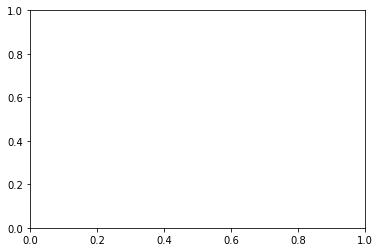

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Features = [permit, permit_recheck, handgun, long_gun, other, multi]
# X = per.values
y = probs_mass_shootings['# Injured'].dropna()
y = probs_mass_shootings['# Injured'].values
# X = X.reshape(-1, 1)
X = permit[0:]
X.reshape(-1, 1)
y = y.reshape(-1, 1)
# type(X), type(y)

plt.scatter(X, y)
plt.ylabel('Number of gun violence')
plt.xlabel('Number of background check')
plt.show


prediction_space = np.linspace(min(X), max(y)).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

array([[0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0],
       ...,
       [1.716596743959296e-06, 1.7074520035241809e-06,
        1.7114788889079053e-06, 6.909250449964936e-06, 0.0],
       [1.3732773951674369e-05, 1.7074520035241809e-06,
        5.134436666723716e-06, 1.5545813512421104e-05,
        3.461782783515683e-06],
       [0.0, 0.0, 0.0, 1.727312612491234e-06, 3.461782783515683e-06]],
      dtype=object)

# Ignore

In [0]:
# df[['A', 'B']] = df[['A', 'B']].apply(np.negative)
# checks_df[all_cols_checks] = df[all_cols_checks].apply()

for check in all_cols_checks:
  checks_df[check]['2017'] = checks_df[check]['2017'] / census_2017

checks_df['handgun']['2017'] = checks_df['handgun']['2017'] / census_2017

#for pair in checks_df[all_cols_checks]:
#  print(pair)
  
#checks_df[all_cols_checks] / census_monthly_spread.values[:, 1:3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
checks_df

State      Month  admin        ... returned_other      totals       
Year                             2017  2018  ...           2017 2018   2017   2018
0           Alabama      April    0.0   0.0  ...            0.0  0.0  32652  34915
1           Alabama     August    0.0   0.0  ...            0.0  0.0  35038  37227
2           Alabama   December    0.0   0.0  ...            0.0  0.0  56545  54383
3           Alabama   February    0.0   0.0  ...            0.0  0.0  46251  45171
4           Alabama    January    0.0   0.0  ...            0.0  0.0  41542  38477
5           Alabama       July    0.0   0.0  ...            0.0  0.0  31474  32572
6           Alabama       June    0.0   0.0  ...            0.0  0.0  35687  32572
7           Alabama      March    0.0   0.0  ...            0.0  0.0  48769  50610
8           Alabama        May    0.0   0.0  ...            0.0  0.0  33331  33193
9           Alabama   November    0.0   0.0  ...            0.0  0.0  47418  45345
10          Alabama    October    0.0   0.0  ...            0.0  0.0  36619  37123
11          Alabama  September    0.0   0.0  ...            0.0  0.0  32019  32706
12           Alaska      April    0.0   0.0  ...            0.0  0.0   6983   7367
13           Alaska     August    0.0   0.0  ...            0.0  0.0   6946   6818
14           Alaska   December    0.0   0.0  ...            0.0  0.0   8330   7251
15           Alaska   February    0.0   0.0  ...            0.0  0.0   5917   5392
16           Alaska    January    0.0   0.0  ...            0.0  0.0   4500   4429
17           Alaska       July    0.0   0.0  ...            9.0  0.0   6487   5714
18           Alaska       June    0.0   0.0  ...            1.0  0.0   6353   6330
19           Alaska      March    0.0   0.0  ...            0.0  0.0   6971   7800
20           Alaska        May    0.0   0.0  ...            0.0  0.0   6442   7548
21           Alaska   November    0.0   0.0  ...            0.0  0.0   7527   6645
22           Alaska    October    0.0   0.0  ...            0.0  0.0   8080   7768
23           Alaska  September    0.0   0.0  ...            0.0  0.0   6303   5699
24          Arizona      April    0.0   0.0  ...            0.0  1.0  32052  31658
25          Arizona     August    0.0   0.0  ...            0.0  1.0  29376  34149
26          Arizona   December    0.0   0.0  ...            0.0  2.0  41559  36275
27          Arizona   February    0.0   0.0  ...            0.0  0.0  37388  36281
28          Arizona    January    0.0   0.0  ...            0.0  0.0  31366  28627
29          Arizona       July    0.0   0.0  ...            0.0  0.0  25714  26359
..              ...        ...    ...   ...  ...            ...  ...    ...    ...
582   West Virginia       June    3.0   2.0  ...            3.0  2.0  14498  14127
583   West Virginia      March    2.0   6.0  ...            0.0  3.0  22529  40701
584   West Virginia        May    7.0   3.0  ...            4.0  5.0  15085  17108
585   West Virginia   November  100.0   9.0  ...            0.0  0.0  24455  22695
586   West Virginia    October    1.0  10.0  ...            0.0  3.0  18256  17523
587   West Virginia  September   11.0   7.0  ...            3.0  0.0  16723  15411
588       Wisconsin      April    0.0   0.0  ...            2.0  3.0  45872  41542
589       Wisconsin     August    0.0   0.0  ...            0.0  3.0  40924  32732
590       Wisconsin   December    0.0   0.0  ...            0.0  1.0  47120  43572
591       Wisconsin   February    0.0   0.0  ...            2.0  2.0  50720  43777
592       Wisconsin    January    0.0   0.0  ...            6.0  1.0  46775  36791
593       Wisconsin       July    0.0   0.0  ...            3.0  1.0  32846  26598
594       Wisconsin       June    0.0   0.0  ...            2.0  3.0  36267  26403
595       Wisconsin      March    0.0   0.0  ...            1.0  3.0  58739  56482
596       Wisconsin        May    0.0   0.0  ...            5.0  3.0  37888  28841
597       Wisconsin   November

In [0]:
# ms stands for mass shootings
checks_vs_ms = checks_df.merge(shootings_df, left_on=['State', 'Year', 'Month'], right_on=['State', 'Year', 'Month'], how='outer')

In [0]:
checks_vs_ms

,State,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Year,Month,# Killed,# Injured
0,Alabama,26029.0,242.0,11463.0,13578.0,464.0,417,0.0,11.0,10.0,0.0,1124.0,1002.0,7.0,0.0,0.0,0.0,0.0,0.0,18.0,12.0,2.0,1.0,2.0,1.0,54383,2018,December,0.0,0.0
1,Alaska,215.0,11.0,2956.0,3278.0,312.0,155,0.0,0.0,0.0,0.0,140.0,105.0,2.0,26.0,28.0,0.0,0.0,0.0,11.0,10.0,2.0,0.0,0.0,0.0,7251,2018,December,0.0,0.0
2,Arizona,4732.0,394.0,15533.0,11436.0,1451.0,874,0.0,10.0,7.0,2.0,1173.0,546.0,4.0,73.0,8.0,2.0,0.0,0.0,15.0,12.0,1.0,1.0,0.0,1.0,36275,2018,December,0.0,0.0
3,Arkansas,2498.0,806.0,8138.0,11736.0,369.0,398,58.0,9.0,14.0,1.0,1012.0,1178.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,30.0,3.0,3.0,2.0,0.0,26272,2018,December,0.0,0.0
4,California,30754.0,0.0,40445.0,34180.0,3808.0,0,0.0,0.0,0.0,0.0,451.0,371.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110017,2018,December,0.0,5.0
5,Colorado,5636.0,0.0,22627.0,18734.0,1874.0,1343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,286.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50544,2018,December,1.0,3.0
6,Connecticut,6433.0,329.0,5904.0,2506.0,947.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16119,2018,December,0.0,0.0
7,Delaware,179.0,0.0,1932.0,2503.0,169.0,83,0.0,3.0,0.0,0.0,11.0,12.0,1.0,34.0,0.0,0.0,0.0,0.0,62.0,29.0,4.0,2.0,0.0,0.0,5024,2018,December,0.0,0.0
8,District of Columbia,147.0,0.0,71.0,4.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223,2018,December,0.0,0.0
9,Florida,16478.0,0.0,60210.0,30598.0,4131.0,2584,0.0,70.0,27.0,1.0,3758.0,1365.0,7.0,642.0,83.0,2.0,0.0,0.0,214.0,134.0,38.0,37.0,39.0,1.0,120419,2018,December,0.0,10.0


In [0]:
checks_vs_ms['# Killed'].fillna(0, inplace = True)
checks_vs_ms['# Injured'].fillna(0, inplace = True)

In [0]:
type_of_check = ['permit', 'permit_recheck', 'handgun', 'long_gun',
                 'other', 'multiple', 'admin', 'prepawn_handgun', 
                 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
                 'redemption_long_gun', 'redemption_other', 'returned_handgun',
                 'returned_long_gun', 'returned_other', 'rentals_handgun', 
                 'rentals_long_gun', 'private_sale_handgun',
                 'private_sale_long_gun', 'private_sale_other',
                 'return_to_seller_handgun', 'return_to_seller_long_gun', 
                 'return_to_seller_other', 'totals']

# Largest correlation is with long_gun 
for toc in type_of_check:
    print("Correlation between", toc, "and # Killed:",
          checks_vs_ms[toc].corr(checks_vs_ms['# Killed']))
   

Correlation between permit and # Killed: 0.04903456236276122
Correlation between permit_recheck and # Killed: 0.06990891415087798
Correlation between handgun and # Killed: 0.29674394950232474
Correlation between long_gun and # Killed: 0.30273294794320826
Correlation between other and # Killed: 0.27204621571388066
Correlation between multiple and # Killed: 0.21280039831382352
Correlation between admin and # Killed: 0.06709627843516598
Correlation between prepawn_handgun and # Killed: 0.18146350975097852
Correlation between prepawn_long_gun and # Killed: 0.15733635545961502
Correlation between prepawn_other and # Killed: 0.012940480889878765
Correlation between redemption_handgun and # Killed: 0.21191259664780002
Correlation between redemption_long_gun and # Killed: 0.17191835899079894
Correlation between redemption_other and # Killed: 0.2174473248781595
Correlation between returned_handgun and # Killed: 0.16928579301912497
Correlation between returned_long_gun and # Killed: 0.1100730292

In [0]:
for toc in type_of_check:
    print("Correlation between", toc, "and # Injured:",
          checks_vs_ms[toc].corr(checks_vs_ms['# Injured']))
    
# Largest correlation with handgun

Correlation between permit and # Injured: 0.07095980023044852
Correlation between permit_recheck and # Injured: 0.2664789078299358
Correlation between handgun and # Injured: 0.31698439947237844
Correlation between long_gun and # Injured: 0.3147820745150818
Correlation between other and # Injured: 0.2949679557134163
Correlation between multiple and # Injured: 0.20495648556896348
Correlation between admin and # Injured: 0.05796011034325881
Correlation between prepawn_handgun and # Injured: 0.1804273042260977
Correlation between prepawn_long_gun and # Injured: 0.131038379915848
Correlation between prepawn_other and # Injured: 0.007988157664862964
Correlation between redemption_handgun and # Injured: 0.1767353528012503
Correlation between redemption_long_gun and # Injured: 0.11817523228803276
Correlation between redemption_other and # Injured: 0.16811199432475854
Correlation between returned_handgun and # Injured: 0.15085792905511639
Correlation between returned_long_gun and # Injured: 0.0

In [0]:
X = checks_vs_ms[[toc]] # Features to train on
y = checks_vs_ms[['# Killed', '# Injured']]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
predictions = lm.predict(X_test)

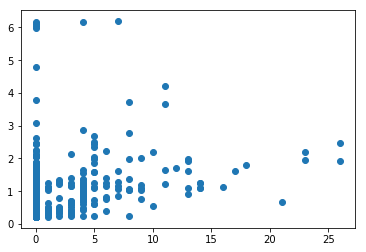

In [0]:
plt.scatter(y_test,predictions)

In [0]:
'''
features = [ 'permit', 'permit_recheck', 'handgun', 'long_gun',
               'other', 'multiple', 'admin', 'prepawn_handgun', 
                 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
                 'redemption_long_gun', 'redemption_other', 'returned_handgun',
                 'returned_long_gun', 'returned_other', 'rentals_handgun', 
                 'rentals_long_gun', 'private_sale_handgun',
                 'private_sale_long_gun', 'private_sale_other',
                 'return_to_seller_handgun', 'return_to_seller_long_gun', 
                 'return_to_seller_other', 'totals']
                
'''


# Might want to correlate with 'State', 'Year', 'Month']

#for f in features:
#    print("Correlation between", f, "and # Killed:",
#          checks_vs_ms[f].corr(checks_vs_ms['# Killed']))

"\nfeatures = [ 'permit', 'permit_recheck', 'handgun', 'long_gun',\n               'other', 'multiple', 'admin', 'prepawn_handgun', \n                 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',\n                 'redemption_long_gun', 'redemption_other', 'returned_handgun',\n                 'returned_long_gun', 'returned_other', 'rentals_handgun', \n                 'rentals_long_gun', 'private_sale_handgun',\n                 'private_sale_long_gun', 'private_sale_other',\n                 'return_to_seller_handgun', 'return_to_seller_long_gun', \n                 'return_to_seller_other', 'totals']\n                \n"

In [0]:
# Using the total number of background checks to determine if it can be used to predict the target (number of deaths in mass shootings)

In [0]:
X = dataframe['probability in 2017']
y = checks_df['2017']